#### Importing the libraries

In [1]:
import numpy as np
import warnings
from scipy import stats
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Read data and get the necessary information

In [2]:
data=pd.read_csv("../data/scraped/all_data_scraped.csv")
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6075,https://ipfs.eth.aragon.network/ipfs/bafybeibo...,16711422,8025715,1644053,6957603,2907218,4089715,2511690,924199,Welcome to MyEtherWallet.com\n\nWe know this c...,no_brand,1
6076,https://ipfs.io/ipfs/bafybeidwjdwmnmxnq44vv73y...,16711421,723464,14995019,12429670,8999485,14739182,1908006,10199466,Your parcel has arrived our office today\n\nPl...,no_brand,1
6077,https://nftstorage.link/ipfs/QmQpoRSeaEfSNZvKa...,16711422,263172,10921638,6184542,0,0,0,0,{},no_brand,1
6078,https://ipfs.io/ipfs/bafybeihztsfcewsafsgyj4tf...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [3]:
data.shape

(6080, 12)

In [4]:
data.describe()

,color1,color2,color3,color4,color5,color6,color7,color8,status
count,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6080.000000
mean,1.452956e+07,7.897265e+06,7.931097e+06,7.407589e+06,7.071474e+06,7.104916e+06,7.028316e+06,7.026409e+06,0.720395
std,4.773604e+06,6.439783e+06,5.183693e+06,4.769442e+06,5.321134e+06,5.452201e+06,5.400480e+06,5.334558e+06,0.448842
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.585611e+07,2.103133e+06,3.355443e+06,3.699167e+06,2.040100e+06,1.712616e+06,2.048607e+06,2.039518e+06,0.000000
50%,1.664563e+07,5.395026e+06,7.171308e+06,6.316902e+06,6.908265e+06,6.397262e+06,6.842472e+06,6.710371e+06,1.000000
75%,1.671142e+07,1.565899e+07,1.190196e+07,1.124763e+07,1.111669e+07,1.247599e+07,1.130912e+07,1.137787e+07,1.000000
max,1.677722e+07,1.677722e+07,1.677722e+07,1.677722e+07,1.671168e+07,1.671168e+07,1.671168e+07,1.671168e+07,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         6080 non-null   object
 1   color1      6080 non-null   int64 
 2   color2      6080 non-null   int64 
 3   color3      6080 non-null   int64 
 4   color4      6080 non-null   int64 
 5   color5      6080 non-null   int64 
 6   color6      6080 non-null   int64 
 7   color7      6080 non-null   int64 
 8   color8      6080 non-null   int64 
 9   text        5799 non-null   object
 10  brand_name  6080 non-null   object
 11  status      6080 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 570.1+ KB


#### Null values

In [6]:
data.isnull().any()

URL           False
color1        False
color2        False
color3        False
color4        False
color5        False
color6        False
color7        False
color8        False
text           True
brand_name    False
status        False
dtype: bool

In [7]:
data.isnull().sum()

URL             0
color1          0
color2          0
color3          0
color4          0
color5          0
color6          0
color7          0
color8          0
text          281
brand_name      0
status          0
dtype: int64

In [8]:
#removing null values
data=data.dropna().reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5794,https://ipfs.eth.aragon.network/ipfs/bafybeibo...,16711422,8025715,1644053,6957603,2907218,4089715,2511690,924199,Welcome to MyEtherWallet.com\n\nWe know this c...,no_brand,1
5795,https://ipfs.io/ipfs/bafybeidwjdwmnmxnq44vv73y...,16711421,723464,14995019,12429670,8999485,14739182,1908006,10199466,Your parcel has arrived our office today\n\nPl...,no_brand,1
5796,https://nftstorage.link/ipfs/QmQpoRSeaEfSNZvKa...,16711422,263172,10921638,6184542,0,0,0,0,{},no_brand,1
5797,https://ipfs.io/ipfs/bafybeihztsfcewsafsgyj4tf...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [9]:
data.shape

(5799, 12)

#### class distribution

In [10]:
data['status'].value_counts()

1    4112
0    1687
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

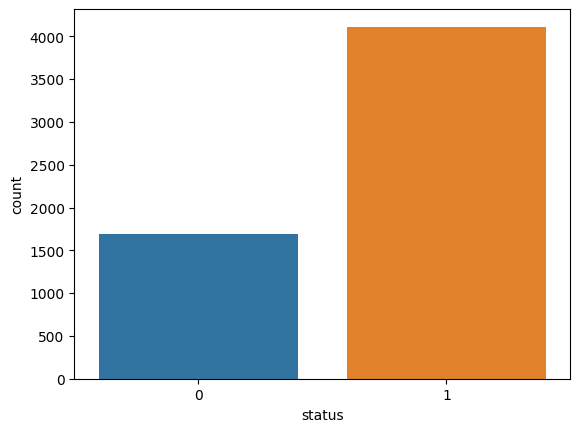

In [11]:
sns.countplot(x=data['status'])

#### total unique values for each feature

In [12]:
data.nunique(axis=0,dropna=True)

URL           4388
color1        1032
color2        2014
color3        2286
color4        2402
color5        2524
color6        2516
color7        2498
color8        2476
text          3633
brand_name      12
status           2
dtype: int64

#### duplicated rows

In [13]:
url_dup=data[data.duplicated()]

In [14]:
url_dup

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
1500,http://searchnetworking.techtarget.com/definit...,16316664,5287850,4092812,6776679,3289650,5413524,10461087,13691368,TechTarget Network Unified Communications Mobi...,no_brand,0
1502,http://www.columbusonlineauctions.com/cgi-bin/...,16711422,3818574,5020625,12314107,4671303,14320487,16106820,9763918,Server Error\n\n404\n\nPage Not Found\n\nThis ...,no_brand,0
1503,http://www.zamzar.com/uploadComplete.php?conve...,16382457,15726074,5478882,4030172,2171169,3105214,5481553,6316128,> ZAMZAR° API FORMATS MY FILES CONVERTERS PRIC...,no_brand,0
1504,http://www.1948.org.uk/un-resolution-181/,3946809,6126129,6498870,15000804,10855580,14875854,13949025,9933134,HOME ABOUTUS MAPS GOOGLE EARTH GALLERY SOURCES...,no_brand,0
1507,http://paulbourke.net/geometry/pointlineplane/,16711422,263172,10724259,6250335,197540,15198198,6316229,9276886,"Points, lines, and planes\n\nIn what follows a...",no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4917,http://reclessstop.ml/american-first-credit-un...,16711422,2249610,1973795,10132122,3765450,2236962,14344939,8954044,AMERICA FIRST\n\nCREDIT UNION\n\nVerify your c...,no_brand,1
4921,https://bafkreiflq57urfp3aw3uau6eoywr2a5p7fn6a...,16711422,15593714,1579032,1982590,16185335,2975940,15420967,1776928,@ OneDrive\n\nOneDrive\nOnedrive Online Limits...,no_brand,1
4923,https://bafybeicrsfgci7qlf3lf2brq4xcl3dyuxmfwv...,16119285,3174335,15265781,7578843,16316921,10395294,3355443,7237230,& Account Settings\n\n© Private computer(What ...,Microsoft,1
4924,https://spotify.ax/payment/6bbc20c3-628b-49e8-...,16711422,1188136,7060617,14935527,5265245,9936288,14610148,2445397,6 Spotify Upgrade\n\nSpotify Upgrade Payment\n...,no_brand,1


In [15]:
u=url_dup['URL']
u

1500    http://searchnetworking.techtarget.com/definit...
1502    http://www.columbusonlineauctions.com/cgi-bin/...
1503    http://www.zamzar.com/uploadComplete.php?conve...
1504            http://www.1948.org.uk/un-resolution-181/
1507       http://paulbourke.net/geometry/pointlineplane/
                              ...                        
4917    http://reclessstop.ml/american-first-credit-un...
4921    https://bafkreiflq57urfp3aw3uau6eoywr2a5p7fn6a...
4923    https://bafybeicrsfgci7qlf3lf2brq4xcl3dyuxmfwv...
4924    https://spotify.ax/payment/6bbc20c3-628b-49e8-...
4928    https://bafybeifhsjdoxvbrwk5n2v7s4vrwca6be3pwx...
Name: URL, Length: 1062, dtype: object

In [16]:
data=data.drop_duplicates(subset='URL', keep="first").reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4383,https://ipfs.eth.aragon.network/ipfs/bafybeibo...,16711422,8025715,1644053,6957603,2907218,4089715,2511690,924199,Welcome to MyEtherWallet.com\n\nWe know this c...,no_brand,1
4384,https://ipfs.io/ipfs/bafybeidwjdwmnmxnq44vv73y...,16711421,723464,14995019,12429670,8999485,14739182,1908006,10199466,Your parcel has arrived our office today\n\nPl...,no_brand,1
4385,https://nftstorage.link/ipfs/QmQpoRSeaEfSNZvKa...,16711422,263172,10921638,6184542,0,0,0,0,{},no_brand,1
4386,https://ipfs.io/ipfs/bafybeihztsfcewsafsgyj4tf...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [17]:
data.nunique(axis=0,dropna=True)

URL           4388
color1        1011
color2        1992
color3        2245
color4        2358
color5        2487
color6        2477
color7        2461
color8        2436
text          3346
brand_name      12
status           2
dtype: int64

### Work with the 'text' feature

#### Getting the general idea of the type of texts we will be dealing with, since the total unique values in dataset for 'text' is NOT the total rows. Which says that it needs some work.

In [18]:
data.nunique()

URL           4388
color1        1011
color2        1992
color3        2245
color4        2358
color5        2487
color6        2477
color7        2461
color8        2436
text          3346
brand_name      12
status           2
dtype: int64

In [19]:
data['text'].value_counts()

410 Gone\n\nopenresty                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             58
Page not found\n\nBack to homepage                                                                                                                                                                                                                                                                                                                                                                 

In [20]:
# created a dataframe to make it look cleaner
ty=pd.DataFrame(data=data['text'].value_counts().sort_values(ascending=False))

In [21]:
# counts=1 means that the web page scraped might be valid and working. so removing those
ty=ty.loc[ty['text'] != 1]

#### Removing texts with counts more than 1. This has been analysed thoroughly, and they really are different types of errors only.

In [22]:
rem_index = []
for i in range(len(ty)):
    common_loc = data.loc[data['text'] == ty.index[i]]
    for j in range(len(data)):
        if data['text'][j] == ty.index[i]:
            rem_index.append(j)
    del common_loc 
len(rem_index)

1324

In [23]:
data=data.drop(labels=rem_index,axis=0)
data=data.reset_index(drop=True)

In [24]:
data.nunique()

URL           3064
color1         953
color2        1875
color3        2089
color4        2181
color5        2297
color6        2287
color7        2298
color8        2265
text          3064
brand_name      12
status           2
dtype: int64

#### Removing texts with error messages.

In [25]:
bad_pages = []
bad_pattern = r"Site Not Found|This page isn’t working|Internal Server Error|This page isn’t working|Your connection is not private|404"
for i in range(len(data)):
    if re.match(bad_pattern, data['text'][i], flags=re.IGNORECASE):
        bad_pages.append(i)
len(bad_pages)

116

In [26]:
temp = data[data.index.isin(bad_pages)]
temp

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
15,http://galanteriafutrzana.pl/gfx/mail.live-pdf...,16711422,16119543,6448488,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
86,https://admindocusgn11-secondary.z13.web.core....,16711422,16119543,6382696,3699167,10199210,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
215,http://xmlgrid.net/xml2text.html,16711422,16119544,3699167,6448488,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,0
448,https://www.motorzona.ru/,16711422,16119543,6448488,3699167,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,0
522,http://rakuten.co.jp.k3kngroeniu4lkdsbnhoirteh...,16711422,16119543,6382696,3699167,10133673,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,https://www.migos.com.hk/wp-content/widget/sig...,16711422,16119543,6448488,3699167,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
2997,https://xeghce.40261.81935.m.shuaihu99.com/,16711422,16119543,6382696,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
3014,https://mybdoonline.net/,16711422,16119544,6448488,3699167,10068138,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
3021,https://eho2cu.43811.wap.shuaihu99.com/,16711422,16119543,6448232,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1


In [27]:
temp = temp.reset_index(drop=True)

In [28]:
# Just for info. There indeed is a url with apple as a brand name.
(temp['brand_name']).value_counts()

no_brand    116
Name: brand_name, dtype: int64

In [29]:
data=data.drop(labels=bad_pages,axis=0)
data=data.reset_index(drop=True)

In [30]:
data.shape

(2948, 12)

### Label Balance after removing some failed pages

<AxesSubplot: xlabel='status', ylabel='count'>

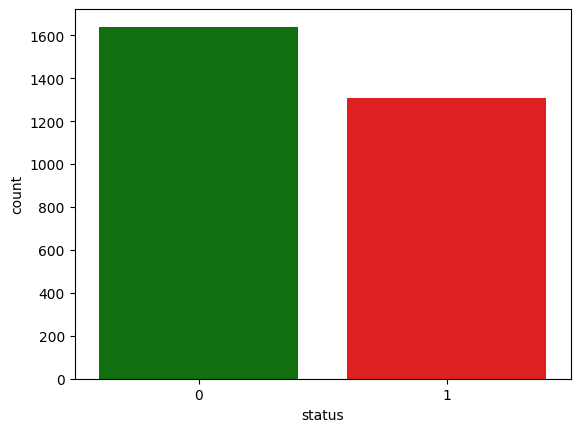

In [31]:
sns.countplot(x=data['status'], palette=['green', 'red'])

### Exploring brand_names col

In [32]:
data['brand_name'].value_counts()

no_brand     2759
Microsoft     135
Amazon         15
Apple          14
AT&T           12
Netflix         4
Intuit          3
Linkedin        2
Zoom            1
Xerox           1
Walmart         1
DocuSign        1
Name: brand_name, dtype: int64

In [33]:
# looks like there might be some use of this column

In [34]:
one_hot = pd.get_dummies(data.brand_name)

In [35]:
one_hot.head(1)

,AT&T,Amazon,Apple,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,no_brand
0,0,0,0,0,0,0,0,0,0,0,0,1


Adding one hot back to df

In [36]:
data = pd.concat([data, one_hot], axis=1)

In [37]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Apple,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,no_brand
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,1


Dropping brand_name col since it is now one hot encoded, dropping no_brand column for redudancy, since 0 on all other brands means no_brand

In [38]:
data = data.drop(['brand_name', 'no_brand'], axis=1)

In [39]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Amazon,Apple,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,0


### Exploring new features based on URL

In [40]:
from urllib.parse import urlparse

def get_top_level_domain(url):
    tld = urlparse(url)
    return tld.netloc
    
tester = get_top_level_domain('http://daniel.com/wp-content/themes/theretailer/inc/addons/login/customer_center/customer-IDPP00C672/myaccount/signin/?country.x=LU&amp;locale.x=en_LU')

In [41]:
# new feature candidate 1
def get_url_len(url_str):
    return len(url_str)

In [42]:
get_url_len(tester)

10

In [43]:
# new feature candidate 2: Character sequence probability
# This is done using a character bigram model
# tried to make this self documenting
import nltk
import math

def get_english_char_bigram_probs():
    words = nltk.corpus.words.words('en') # loading in a corpus of words
    bg_cnts = {}
    ung_cnts = {}
    # going through each word in the corpus
    for word in words:
        padding = ' ' # needed for bigram models
        word = padding + word.lower() + padding
        # getting characters
        chars = [c for c in word]
        bgs = nltk.bigrams(chars) # getting bigrams
        
        # adding bigram to counts dictionary
        for bigram in bgs:
            bg_cnts[bigram] = bg_cnts[bigram] + 1 if bigram in bg_cnts else 1
            
        #adding unigram to count dictionary
        for unigram in chars:
            ung_cnts[unigram] = ung_cnts[unigram] + 1 if unigram in ung_cnts else 1
    
    # turning each count into a probability (MLE)
    for k, v in bg_cnts.items():
        first_word, _ = k
        denom = ung_cnts[first_word]
        bg_cnts[k] = v/denom # now it is a conditional probability
        
    # same for unigrams
    norm = sum(ung_cnts.values())
    for k, v in ung_cnts.items():
        ung_cnts[k] = v/norm

    return bg_cnts, ung_cnts
    
bg_probs, ung_probs = get_english_char_bigram_probs()
bg_probs[('e', 'n')] # for example 

0.10653080129689671

In [44]:
def get_score(ung_probs, bg_probs, url_str):
    url_chars = [c for c in url_str]
    url_bgs = nltk.bigrams(url_chars)
    
    # getting a score of each url char bigram
    score = 0
    for bigram in url_bgs:
        # using linear interpolatation smoothing in negative log space to prevent underflow (lambda 0.5)
        first_word, _ = bigram
        score += 0.5*bg_probs.get(bigram, 0) + 0.5*ung_probs.get(first_word, 0)
        # TODO probably should do entropy here
    return score
get_score(ung_probs, bg_probs, tester)

0.5483671288246614

In [45]:
bg_probs, ung_probs = get_english_char_bigram_probs()

url_lens = []
url_scores = []
for url in data['URL']:
    tld = get_top_level_domain(url)
    l = get_url_len(tld)
    score = get_score(ung_probs, bg_probs, tld)
    url_lens.append(l)
    url_scores.append(score)

In [46]:
# adding new features to data
data['url_len'] = url_lens
data['tld_char_score'] = url_scores

In [47]:
data.head(2)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,url_len,tld_char_score
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,17,0.683042
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,...,0,0,0,0,0,0,0,0,23,1.388078


In [48]:
# splitting for corr checking

In [49]:
y = data['status']
X = data.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Checking correlations between features

In [50]:
abs(X_train.corr())

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_5199/3642790581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corr())


,color1,color2,color3,color4,color5,color6,color7,color8,AT&T,Amazon,...,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,url_len,tld_char_score
color1,1.000000,0.134770,0.106126,0.088675,0.081863,0.019294,0.031445,0.016081,0.026614,0.018140,...,0.002605,0.012817,0.014628,0.072583,0.033337,0.009494,0.010221,0.010463,0.100617,0.086397
color2,0.134770,1.000000,0.149508,0.123810,0.014175,0.047147,0.016049,0.010868,0.020241,0.030634,...,0.012074,0.019241,0.003915,0.090551,0.026114,0.016214,0.020399,0.023688,0.069807,0.053961
color3,0.106126,0.149508,1.000000,0.003398,0.008222,0.006798,0.018903,0.028153,0.038647,0.004532,...,0.019274,0.025933,0.006634,0.112444,0.019182,0.002779,0.027380,0.028608,0.029155,0.001841
color4,0.088675,0.123810,0.003398,1.000000,0.042620,0.059351,0.068721,0.071446,0.002679,0.010404,...,0.011961,0.010120,0.032525,0.023532,0.018375,0.013512,0.001600,0.010284,0.002492,0.008143
color5,0.081863,0.014175,0.008222,0.042620,1.000000,0.134692,0.187809,0.162930,0.000510,0.007770,...,0.017473,0.005821,0.000810,0.042484,0.026742,0.015765,0.024362,0.004137,0.034592,0.025636
color6,0.019294,0.047147,0.006798,0.059351,0.134692,1.000000,0.209162,0.171831,0.031169,0.002465,...,0.027763,0.006299,0.000632,0.068409,0.021872,0.002581,0.007833,0.001707,0.027907,0.022675
color7,0.031445,0.016049,0.018903,0.068721,0.187809,0.209162,1.000000,0.204217,0.019785,0.015205,...,0.033233,0.021046,0.019920,0.030390,0.016235,0.019259,0.006802,0.024631,0.016806,0.020033
color8,0.016081,0.010868,0.028153,0.071446,0.162930,0.171831,0.204217,1.000000,0.015749,0.000911,...,0.003308,0.002280,0.032196,0.005979,0.002033,0.022646,0.021497,0.016665,0.004911,0.017511
AT&T,0.026614,0.020241,0.038647,0.002679,0.000510,0.031169,0.019785,0.015749,1.000000,0.003609,...,0.000999,0.001731,0.001413,0.010998,0.001999,0.000999,0.000999,0.000999,0.013412,0.003661
Amazon,0.018140,0.030634,0.004532,0.010404,0.007770,0.002465,0.015205,0.000911,0.003609,1.000000,...,0.001363,0.002361,0.001927,0.015005,0.002727,0.001363,0.001363,0.001363,0.016782,0.005861


In [51]:
# All the colors seem highly correleated, URL features are too

Checking correleation with target (training data)

In [52]:
abs(X_train.corrwith(y_train))

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_5199/2725760261.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corrwith(y_train))


color1            0.107620
color2            0.033305
color3            0.039001
color4            0.038269
color5            0.024240
color6            0.075325
color7            0.088273
color8            0.095436
AT&T              0.042553
Amazon            0.008653
Apple             0.007926
DocuSign          0.021646
Intuit            0.014943
Linkedin          0.002989
Microsoft         0.160483
Netflix           0.043317
Walmart           0.021646
Xerox             0.017420
Zoom              0.017420
url_len           0.289338
tld_char_score    0.234513
dtype: float64